In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import patsy

In [11]:
website = pd.read_csv('website.csv')
website.head()

,time_seconds,age,browser
0,486.0,47.1,Safari
1,645.7,64.6,Chrome
2,345.0,45.4,Safari
3,413.4,34.4,Chrome
4,426.4,31.3,Safari


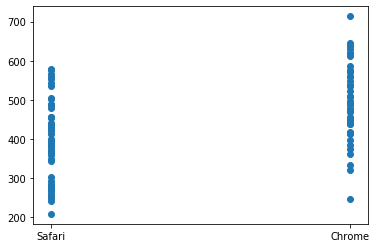

In [6]:
plt.scatter(website.browser, website.time_seconds)
plt.show()

In [4]:
website.groupby('browser').mean().time_seconds

browser
Chrome    489.704255
Safari    390.647170
Name: time_seconds, dtype: float64

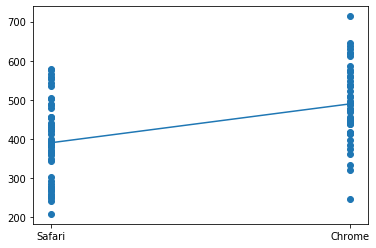

In [7]:
plt.scatter(website.browser, website.time_seconds)
plt.plot([0,1], [390.647170,489.704255])
plt.show()

In [8]:
model = sm.OLS.from_formula('time_seconds ~ browser', website).fit()
print(model.params)

Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64


In [9]:
website.groupby('browser').mean().time_seconds

browser
Chrome    489.704255
Safari    390.647170
Name: time_seconds, dtype: float64

In [10]:
print(390.647170 - 489.704255)

-99.05708499999997


In [14]:
rentals = pd.read_csv('rentals.csv')
rentals.head()

,rent,borough
0,5295,Brooklyn
1,4020,Manhattan
2,16000,Manhattan
3,3150,Queens
4,2955,Queens


In [16]:
y, X = patsy.dmatrices('rent ~ borough', rentals)
print(X[0:5])

[[1. 0. 0.]
 [1. 1. 0.]
 [1. 1. 0.]
 [1. 0. 1.]
 [1. 0. 1.]]


In [17]:
model = sm.OLS(y,X).fit()
print(model.params)

[3327.40375123 1811.5366274  -811.25642981]


In [18]:
# note: we just did this same calculation in 2 steps:
model = sm.OLS.from_formula('rent ~ borough', rentals).fit()
print(model.params)

Intercept               3327.403751
borough[T.Manhattan]    1811.536627
borough[T.Queens]       -811.256430
dtype: float64


In [19]:
print(rentals.groupby('borough').mean())

                  rent
borough               
Brooklyn   3327.403751
Manhattan  5138.940379
Queens     2516.147321


In [20]:
5138.940379 - 3327.403751

1811.5366279999998

In [21]:
2516.147321 - 3327.403751

-811.2564299999999

In [22]:
# changing the reference category:

model = sm.OLS.from_formula('rent ~ C(borough, Treatment("Manhattan"))', rentals).fit()
print(model.params)

Intercept                                         5138.940379
C(borough, Treatment("Manhattan"))[T.Brooklyn]   -1811.536627
C(borough, Treatment("Manhattan"))[T.Queens]     -2622.793057
dtype: float64


In [23]:
# creating this "manually"

rentals = pd.get_dummies(rentals, columns = ['borough'], drop_first = True)
print(rentals.head())

    rent  borough_Manhattan  borough_Queens
0   5295                  0               0
1   4020                  1               0
2  16000                  1               0
3   3150                  0               1
4   2955                  0               1


In [24]:
from sklearn.linear_model import LinearRegression
 
X = rentals[['borough_Manhattan', 'borough_Queens']]
y = rentals[['rent']]
 
# Fit model
regr = LinearRegression()
regr.fit(X, y)
print(regr.intercept_)
print(regr.coef_)

[3327.40375123]
[[1811.5366274  -811.25642981]]
